In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

##Importing libraries

In [55]:
import pandas as pd
import numpy as np
np.random.seed(0)
from io import BytesIO
import requests


import sys
sys.path.insert(1, "../")

from IPython.display import Markdown, display

##Downloading Data

In [56]:
dataset_urls = {'demographics':'https://docs.google.com/spreadsheets/d/1XSHrhhp3co-Ay8QkAdzZTofbXqaSYa8WHXBZVq2gPrE/edit#gid=1340117494',
                'loans':'https://docs.google.com/spreadsheets/d/1HA4hb2Q5QeL3Ba-RuO5dBXgr_uydin22Hj-o334XpPU/edit#gid=1784350939',
                'portfolio': 'https://docs.google.com/spreadsheets/d/1BgBLbuNGBVtQHQwVRL9472bwbIA4vJoEuKeOFtktB6Q/edit#gid=83203607',
                'transactions': 'https://docs.google.com/spreadsheets/d/1I_koxLdvs6QNJ30I5532lzMravUWUvg_f6dHL1cZVhs/edit#gid=1169374983'}

                

csv_export_urls = {k:v.replace('/edit#gid=', '/export?format=csv&gid=') for k,v in dataset_urls.items()}

  


In [54]:
demographics=pd.read_csv(csv_export_urls['demographics'])
loans=pd.read_csv(csv_export_urls['loans'])
portfolio=pd.read_csv(csv_export_urls['portfolio'])
transactions=pd.read_csv(csv_export_urls['transactions'])

In [57]:
list_of_dfs=[demographics, loans, portfolio, transactions]


In [58]:
for df in list_of_dfs:
   print(df.shape)

(48427, 15)
(48427, 12)
(505827, 6)
(98352, 12)


In [59]:
demographics.head()

,custid,Name,Job,Age,Lat,Long,Income,CreditScore,HouseholdSize,ZipCode,MajorCity,State,MedianHomeValue,MedianHouseholdIncome,Debt
0,92886957,Barbara Thompson,Automotive Service Technicians and Mechanics,39,31.84568,-102.36764,43415,658,4,79761,Odessa,TX,94700,44174,23878.25
1,16462625,James Wade,Prosthodontists,93,42.73920,-84.62081,564164,786,4,48917,Lansing,MI,138000,51830,5641.64
2,89457436,Joel Jackson,Surgeons,99,44.27804,-88.27205,466344,676,1,54140,Little Chute,WI,139200,58247,233172.00
3,68462543,Tyler Clements,Physicians and Surgeons,100,33.50921,-111.89903,756171,694,2,85250,Scottsdale,AZ,250200,59358,378085.50
4,63315493,Adam Stephens,"Railroad Brake, Signal, and Switch Operators",97,33.93113,-117.54866,58948,688,2,92860,Norco,CA,385100,84905,30063.48


In [60]:
loans.head()

,custid,Income,CreditScore,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus
0,92886957,43415,658,23878.25,2017-09-01,180,0.036,3,179930.0,71972.0,Government_insured,Approved
1,16462625,564164,786,5641.64,2019-09-13,480,0.038,5,386400.0,38640.0,Fixed_rate,Approved
2,89457436,466344,676,233172.00,2018-06-05,180,0.037,4,375840.0,75168.0,Government_insured,Approved
3,68462543,756171,694,378085.50,2018-04-26,180,0.036,2,675540.0,67554.0,Government_insured,Approved
4,63315493,58948,688,30063.48,2017-06-08,420,0.035,0,731690.0,146338.0,Government_insured,Approved


In [61]:
portfolio.head()

,custid,num_shares,purchase_date,ticker,name,exchange
0,92886957,44,2017-05-08,TI,Telecom Italia S.p.A.,NYQ
1,92886957,141,2018-09-07,PN,"Patriot National, Inc.",NYQ
2,92886957,319,2019-03-31,FIX,"Comfort Systems USA, Inc.",NYQ
3,92886957,299,2019-10-17,OCIP,OCI Partners LP,NYQ
4,92886957,233,2018-04-27,NMZ,Nuveen Municipal High Income Opportunity Fund,NYQ


In [62]:
transactions.head()

,HSTX_CDT_CUSTID,HSTX_DBT_CUSTID,HSTX_TRANS_TYPE,HSTX_VALUEDATE,HSTX_AMOUNT,HSTX_CDTAMT_CURR,HSTX_DBTAMT_CURR,HSTX_DIRECTION,HSTX_PYMT_METH,HSTX_CDT_AMT,HSTX_DBT_AMT,HSTX_MSGSTAT
0,76924408,928167987852,CT,2014-06-06,274.29,USD,USD,O,FX,274.29,274.29,WACK
1,32326789,63945812,DD,2014-06-06,130.29,USD,USD,I,FX,130.29,130.29,VCAL
2,39473707,43689422,DD,2014-06-06,630.96,USD,USD,I,SECURAD,630.96,630.96,RJCT
3,695281198595,3501542,DD,2014-06-06,4974.87,USD,USD,I,FED,4974.87,4974.87,OUTP
4,42418252,556029831173,DD,2014-06-06,2401.05,USD,USD,I,SWIFT,2401.05,2401.05,FXRP


##Merge Data and Data Processing

In [63]:
demographics_loans_joined=pd.merge(demographics, loans, on=['custid', 'Income', 'Debt', 'CreditScore'], how='inner')

In [64]:
demographics_loans_joined.shape

(48427, 23)

In [65]:
demographics_loans_joined.head()

,custid,Name,Job,Age,Lat,Long,Income,CreditScore,HouseholdSize,ZipCode,MajorCity,State,MedianHomeValue,MedianHouseholdIncome,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus
0,92886957,Barbara Thompson,Automotive Service Technicians and Mechanics,39,31.84568,-102.36764,43415,658,4,79761,Odessa,TX,94700,44174,23878.25,2017-09-01,180,0.036,3,179930.0,71972.0,Government_insured,Approved
1,16462625,James Wade,Prosthodontists,93,42.73920,-84.62081,564164,786,4,48917,Lansing,MI,138000,51830,5641.64,2019-09-13,480,0.038,5,386400.0,38640.0,Fixed_rate,Approved
2,89457436,Joel Jackson,Surgeons,99,44.27804,-88.27205,466344,676,1,54140,Little Chute,WI,139200,58247,233172.00,2018-06-05,180,0.037,4,375840.0,75168.0,Government_insured,Approved
3,68462543,Tyler Clements,Physicians and Surgeons,100,33.50921,-111.89903,756171,694,2,85250,Scottsdale,AZ,250200,59358,378085.50,2018-04-26,180,0.036,2,675540.0,67554.0,Government_insured,Approved
4,63315493,Adam Stephens,"Railroad Brake, Signal, and Switch Operators",97,33.93113,-117.54866,58948,688,2,92860,Norco,CA,385100,84905,30063.48,2017-06-08,420,0.035,0,731690.0,146338.0,Government_insured,Approved


In [66]:
demographics_loans_joined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48427 entries, 0 to 48426
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   custid                 48427 non-null  int64  
 1   Name                   48427 non-null  object 
 2   Job                    48427 non-null  object 
 3   Age                    48427 non-null  int64  
 4   Lat                    48427 non-null  float64
 5   Long                   48427 non-null  float64
 6   Income                 48427 non-null  int64  
 7   CreditScore            48427 non-null  int64  
 8   HouseholdSize          48427 non-null  int64  
 9   ZipCode                48427 non-null  int64  
 10  MajorCity              48427 non-null  object 
 11  State                  48427 non-null  object 
 12  MedianHomeValue        48427 non-null  int64  
 13  MedianHouseholdIncome  48427 non-null  int64  
 14  Debt                   48427 non-null  float64
 15  Da

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [68]:
le=LabelEncoder()
le.fit(demographics_loans_joined['LoanStatus'])
cat_Loan_status=le.transform(demographics_loans_joined['LoanStatus'])
demographics_loans_joined['LoanStatus']=cat_Loan_status
for i in range(len(demographics_loans_joined)):
  if demographics_loans_joined.loc[i,'LoanStatus']==0:
    demographics_loans_joined.loc[i,'LoanStatus']=1
  else:
    demographics_loans_joined.loc[i,'LoanStatus']=0

le.classes_

array(['Approved', 'Rejected'], dtype=object)

In [69]:

le.fit(demographics_loans_joined['ProductType'])
cat_ProductType=le.transform(demographics_loans_joined['ProductType'])
le.classes_

array(['Adjustable_rate', 'Fixed_rate', 'Government_insured', 'Jumbo'],
      dtype=object)

In [70]:
product_type = np.array(['Adjustable_rate', 'Fixed_rate', 'Government_insured', 'Jumbo'])
product_coded = le.transform(product_type)
product_dic={}
for i in range(len(product_type)):
  product_dic[product_type[i]]=product_coded[i]

In [71]:
product_dic

{'Adjustable_rate': 0, 'Fixed_rate': 1, 'Government_insured': 2, 'Jumbo': 3}

In [72]:
le.fit(demographics_loans_joined['State'])
cat_State=le.transform(demographics_loans_joined['State'])
le.classes_

array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'HI', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'NC', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV'],
      dtype=object)

In [73]:

demographics_loans_joined['ProductType']=cat_ProductType
demographics_loans_joined['State']=cat_State

In [74]:
import matplotlib.pyplot as plt

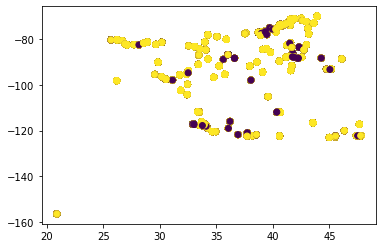

In [75]:
fig = plt.scatter( demographics_loans_joined['Lat'], 
                   demographics_loans_joined['Long'],
                    c = demographics_loans_joined['LoanStatus'])

In [76]:
#not much bias wrt location can be found , hence we can drop latitude and longitude from the model

In [77]:
demographics_loans_joined.head()

,custid,Name,Job,Age,Lat,Long,Income,CreditScore,HouseholdSize,ZipCode,MajorCity,State,MedianHomeValue,MedianHouseholdIncome,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus
0,92886957,Barbara Thompson,Automotive Service Technicians and Mechanics,39,31.84568,-102.36764,43415,658,4,79761,Odessa,36,94700,44174,23878.25,2017-09-01,180,0.036,3,179930.0,71972.0,2,1
1,16462625,James Wade,Prosthodontists,93,42.73920,-84.62081,564164,786,4,48917,Lansing,19,138000,51830,5641.64,2019-09-13,480,0.038,5,386400.0,38640.0,1,1
2,89457436,Joel Jackson,Surgeons,99,44.27804,-88.27205,466344,676,1,54140,Little Chute,41,139200,58247,233172.00,2018-06-05,180,0.037,4,375840.0,75168.0,2,1
3,68462543,Tyler Clements,Physicians and Surgeons,100,33.50921,-111.89903,756171,694,2,85250,Scottsdale,2,250200,59358,378085.50,2018-04-26,180,0.036,2,675540.0,67554.0,2,1
4,63315493,Adam Stephens,"Railroad Brake, Signal, and Switch Operators",97,33.93113,-117.54866,58948,688,2,92860,Norco,3,385100,84905,30063.48,2017-06-08,420,0.035,0,731690.0,146338.0,2,1


In [78]:
X=demographics_loans_joined[['Age',  'Income', 'CreditScore',
       'HouseholdSize', 'State', 'MedianHomeValue',
       'MedianHouseholdIncome', 'Debt', 'LoanTerm', 'InterestRate',
       'CreditIncidents', 'HomeValue', 'LoanAmount', 'ProductType']]       # Take latitude and longitude later
Y=demographics_loans_joined['LoanStatus']


In [79]:
columns=['Age',  'Income', 'CreditScore',
       'HouseholdSize', 'State', 'MedianHomeValue',
       'MedianHouseholdIncome', 'Debt', 'LoanTerm', 'InterestRate',
       'CreditIncidents', 'HomeValue', 'LoanAmount', 'ProductType']

In [82]:
X.head(20)

,Age,Income,CreditScore,HouseholdSize,State,MedianHomeValue,MedianHouseholdIncome,Debt,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType
0,39,43415,658,4,36,94700,44174,23878.25,180,0.036,3,179930.0,71972.0,2
1,93,564164,786,4,19,138000,51830,5641.64,480,0.038,5,386400.0,38640.0,1
2,99,466344,676,1,41,139200,58247,233172.00,180,0.037,4,375840.0,75168.0,2
3,100,756171,694,2,2,250200,59358,378085.50,180,0.036,2,675540.0,67554.0,2
4,97,58948,688,2,3,385100,84905,30063.48,420,0.035,0,731690.0,146338.0,2
5,73,36360,659,10,6,127300,45059,14180.40,180,0.040,3,292790.0,58558.0,0
6,67,54375,716,9,6,153500,45029,9243.75,360,0.045,0,307000.0,214900.0,1
7,20,858635,782,4,14,88900,30958,103036.20,480,0.039,3,266700.0,133350.0,0
8,44,37837,659,2,19,57500,30000,16648.28,360,0.035,2,138000.0,82800.0,2
9,68,653902,792,4,41,178600,64930,58851.18,480,0.035,0,464360.0,139308.0,2


In [81]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: LoanStatus, dtype: int64

##Splitting data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.corr()

,Age,Income,CreditScore,HouseholdSize,State,MedianHomeValue,MedianHouseholdIncome,Debt,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType
Age,1.000000,-0.006017,-0.011022,0.001915,0.002537,-0.003434,-0.008276,0.003670,-0.000703,-0.005275,0.004997,-0.004557,-0.003636,-0.004297
Income,-0.006017,1.000000,0.666356,-0.013099,0.004383,0.009596,0.003256,0.533846,-0.000596,0.002510,-0.000474,0.174596,0.134705,0.100467
CreditScore,-0.011022,0.666356,1.000000,-0.017757,0.004385,0.001474,-0.001649,0.080175,-0.003003,-0.008009,-0.003175,0.141476,0.111945,0.161203
HouseholdSize,0.001915,-0.013099,-0.017757,1.000000,-0.005223,-0.002697,-0.004945,-0.001491,-0.002836,-0.004802,0.002288,-0.006225,-0.009060,-0.003561
State,0.002537,0.004383,0.004385,-0.005223,1.000000,-0.172841,-0.075151,-0.001233,0.000709,0.005825,0.008316,-0.164696,-0.130621,-0.049223
MedianHomeValue,-0.003434,0.009596,0.001474,-0.002697,-0.172841,1.000000,0.665517,0.003509,-0.001703,0.001564,-0.005526,0.948278,0.733529,0.259052
MedianHouseholdIncome,-0.008276,0.003256,-0.001649,-0.004945,-0.075151,0.665517,1.000000,0.000519,-0.006295,-0.001184,-0.004519,0.628224,0.483682,0.138508
Debt,0.003670,0.533846,0.080175,-0.001491,-0.001233,0.003509,0.000519,1.000000,0.002850,0.009552,-0.008089,0.095162,0.072911,0.015388
LoanTerm,-0.000703,-0.000596,-0.003003,-0.002836,0.000709,-0.001703,-0.006295,0.002850,1.000000,0.000846,0.006768,-0.005393,-0.006633,-0.002395
InterestRate,-0.005275,0.002510,-0.008009,-0.004802,0.005825,0.001564,-0.001184,0.009552,0.000846,1.000000,-0.003181,0.001359,0.001177,-0.383173


In [ ]:
from google.colab import files
X_train.corr().to_csv('Corr.csv') 
files.download('Corr.csv')

In [ ]:
Y_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics import f1_score
import numpy as np
from sklearn import metrics

##Normalization of data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(data=X_train,columns=['Age',  'Income', 'CreditScore',
       'HouseholdSize', 'State', 'MedianHomeValue',
       'MedianHouseholdIncome', 'Debt', 'LoanTerm', 'InterestRate',
       'CreditIncidents', 'HomeValue', 'LoanAmount', 'ProductType'])
X_test = pd.DataFrame(data=X_test,columns=['Age',  'Income', 'CreditScore',
       'HouseholdSize', 'State', 'MedianHomeValue',
       'MedianHouseholdIncome', 'Debt', 'LoanTerm', 'InterestRate',
       'CreditIncidents', 'HomeValue', 'LoanAmount', 'ProductType'])
X_train

##Implementing Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(max_iter=1000,random_state=7)

In [ ]:
log.fit(X_train,Y_train)

In [ ]:
log_train_predict = log.predict(X_train)

In [ ]:
np.mean(Y_train==log_train_predict)

In [ ]:
Y_test_log = log.predict(X_test)

In [ ]:
np.mean(Y_test==Y_test_log)

In [ ]:
log.coef_

In [ ]:
columns

In [ ]:
[(a,b) for (a,b) in (zip(columns,log.coef_.reshape(14,)))]
# np.hstack([columns,log.coef_.reshape(14,)])

In [ ]:
coef_weight = pd.DataFrame([(a,b) for (a,b) in (zip(columns,log.coef_.reshape(14,)))],columns=['Feature','Weightage'])
coef_weight

In [ ]:
coef_weight.sort_values(by=['Weightage']).reset_index(drop=True)

##Calculation of Metrics

In [ ]:
f1_score(Y_test, Y_test_log)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_test_log)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Logistic estimator')
display.plot()  
plt.show()     

In [ ]:
# plt.figure(figsize=(10,8))
# plt.plot(fpr,label="fpr")
# plt.plot(tpr,label="tpr")
# plt.plot(thresholds,label="threshold")
# plt.legend()
# plt.show()

##Implementation of Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
sktree=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=8,random_state=7)

In [ ]:
sktree.fit(X_train,Y_train)

In [ ]:
sktree.score(X_test,Y_test)

In [ ]:
dt_weights=sktree.feature_importances_

In [ ]:
coef_weight_dt = pd.DataFrame([(a,b) for (a,b) in (zip(columns,dt_weights.reshape(14,)))],columns=['Feature','Weightage'])
coef_weight_dt.sort_values(by=['Weightage']).reset_index(drop=True)

In [ ]:
Y_test_dt=sktree.predict(X_test)

##Calculation of Metrics

In [ ]:
fowlkes_mallows_score(Y_test,Y_test_dt)

In [ ]:
f1_score(Y_test, Y_test_dt)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_test_dt)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Decistion tree estimator')
display.plot()  
plt.show()

##Implementation of Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=4,random_state=7)

In [ ]:
rf.fit(X_train,Y_train)

In [ ]:
rf.score(X_test,Y_test)

In [ ]:
Y_test_rf=rf.predict(X_test)

In [ ]:
rf_weights=rf.feature_importances_*1000

In [ ]:
coef_weight_rf = pd.DataFrame([(a,b) for (a,b) in (zip(columns,rf_weights.reshape(14,)))],columns=['Feature','Weightage'])
coef_weight_rf.sort_values(by=['Weightage']).reset_index(drop=True)

##Calculation of Metrics

In [ ]:
fowlkes_mallows_score(Y_test,Y_test_rf)

In [ ]:
f1_score(Y_test, Y_test_rf)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_test_rf)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Random forest estimator')
display.plot()  
plt.show()

In [ ]:
!pip install pytorch_tabnet

##Implementation of Tabnet Classifier

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.multitask import TabNetMultiTaskClassifier


In [ ]:
clf = TabNetClassifier()

In [ ]:
clf.fit(X_train.values, Y_train.values,eval_set=[(X_test.values,Y_test.values)],eval_metric=['auc'])

epoch 0  | loss: 0.38248 | val_0_auc: 0.93652 |  0:00:01s
epoch 1  | loss: 0.21691 | val_0_auc: 0.97137 |  0:00:03s
epoch 2  | loss: 0.18427 | val_0_auc: 0.97544 |  0:00:05s
epoch 3  | loss: 0.18121 | val_0_auc: 0.97511 |  0:00:06s
epoch 4  | loss: 0.16513 | val_0_auc: 0.97993 |  0:00:08s
epoch 5  | loss: 0.15771 | val_0_auc: 0.98111 |  0:00:09s
epoch 6  | loss: 0.15637 | val_0_auc: 0.98302 |  0:00:11s
epoch 7  | loss: 0.15196 | val_0_auc: 0.98168 |  0:00:12s
epoch 8  | loss: 0.1523  | val_0_auc: 0.9832  |  0:00:14s
epoch 9  | loss: 0.14994 | val_0_auc: 0.98481 |  0:00:15s
epoch 10 | loss: 0.14155 | val_0_auc: 0.9847  |  0:00:17s
epoch 11 | loss: 0.13912 | val_0_auc: 0.98483 |  0:00:19s
epoch 12 | loss: 0.14179 | val_0_auc: 0.98595 |  0:00:20s
epoch 13 | loss: 0.13132 | val_0_auc: 0.9886  |  0:00:22s
epoch 14 | loss: 0.12588 | val_0_auc: 0.98856 |  0:00:23s
epoch 15 | loss: 0.12249 | val_0_auc: 0.99001 |  0:00:25s
epoch 16 | loss: 0.12002 | val_0_auc: 0.99007 |  0:00:26s
epoch 17 | los

In [ ]:
Y_test_tab=clf.predict(X_test.values)

In [ ]:
Y_test_tab

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
tab_weights=clf.feature_importances_*1000
coef_weight_tab = pd.DataFrame([(a,b) for (a,b) in (zip(columns,tab_weights.reshape(14,)))],columns=['Feature','Weightage'])
coef_weight_tab.sort_values(by=['Weightage']).reset_index(drop=True)

,Feature,Weightage
0,Age,0.000000
1,HomeValue,0.000000
2,LoanAmount,0.000000
3,InterestRate,0.403130
4,ProductType,0.741963
5,Debt,3.417607
6,HouseholdSize,4.975820
7,MedianHouseholdIncome,20.808229
8,LoanTerm,21.120599
9,Income,53.259280


In [ ]:
filename = 'finalized_tabnet_model.pickle'
pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

##Calculation of metrics

In [ ]:
fowlkes_mallows_score(Y_test,Y_test_tab)

0.9606776857661832

In [ ]:
f1_score(Y_test, Y_test_tab)

0.9830260267589696

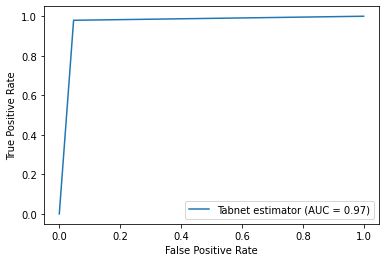

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_test_tab)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Tabnet estimator')
display.plot()  
plt.show()

##Implementation of XGBoost

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:

xg = XGBClassifier(random_state=7)
xg.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=7,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgboost_weights=xg.feature_importances_*1000
coef_weight_xgboost = pd.DataFrame([(a,b) for (a,b) in (zip(columns,xgboost_weights.reshape(14,)))],columns=['Feature','Weightage'])
coef_weight_xgboost.sort_values(by=['Weightage']).reset_index(drop=True)

,Feature,Weightage
0,Age,0.000000
1,HouseholdSize,0.000000
2,State,0.000000
3,LoanTerm,0.000000
4,InterestRate,0.000000
5,HomeValue,0.000000
6,MedianHomeValue,24.704988
7,Debt,26.819668
8,ProductType,41.321068
9,LoanAmount,44.296696


In [ ]:
Y_test_xgboost=xg.predict(X_test)

##Calculation of metrics

In [ ]:
fowlkes_mallows_score(Y_test,Y_test_xgboost)

0.9541037052061456

In [ ]:
f1_score(Y_test, Y_test_xgboost)

0.9800823263842784

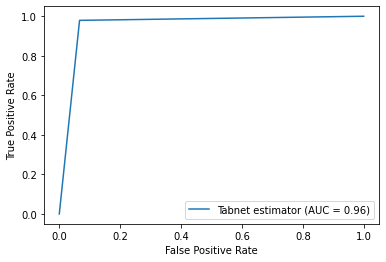

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_test_xgboost)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Tabnet estimator')
display.plot()  
plt.show()

##Implementation of Lightgbm

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgb = LGBMClassifier()

In [ ]:
lgb.fit(X_train,Y_train,eval_set=[(X_test,Y_test)],eval_metric=['auc'])

[1]	valid_0's auc: 0.987206	valid_0's binary_logloss: 0.447135
[2]	valid_0's auc: 0.987893	valid_0's binary_logloss: 0.388743
[3]	valid_0's auc: 0.992703	valid_0's binary_logloss: 0.343432
[4]	valid_0's auc: 0.993238	valid_0's binary_logloss: 0.306938
[5]	valid_0's auc: 0.993511	valid_0's binary_logloss: 0.276424
[6]	valid_0's auc: 0.995483	valid_0's binary_logloss: 0.250394
[7]	valid_0's auc: 0.99571	valid_0's binary_logloss: 0.228568
[8]	valid_0's auc: 0.99581	valid_0's binary_logloss: 0.209419
[9]	valid_0's auc: 0.996072	valid_0's binary_logloss: 0.192608
[10]	valid_0's auc: 0.99612	valid_0's binary_logloss: 0.177889
[11]	valid_0's auc: 0.996295	valid_0's binary_logloss: 0.16503
[12]	valid_0's auc: 0.996302	valid_0's binary_logloss: 0.153643
[13]	valid_0's auc: 0.996593	valid_0's binary_logloss: 0.143636
[14]	valid_0's auc: 0.996817	valid_0's binary_logloss: 0.134364
[15]	valid_0's auc: 0.997061	valid_0's binary_logloss: 0.126112
[16]	valid_0's auc: 0.997256	valid_0's binary_logloss

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgb_weights=xg.feature_importances_*1000
coef_weight_lgb = pd.DataFrame([(a,b) for (a,b) in (zip(columns,lgb_weights.reshape(14,)))],columns=['Feature','Weightage'])
coef_weight_lgb.sort_values(by=['Weightage']).reset_index(drop=True)

,Feature,Weightage
0,Age,0.000000
1,HouseholdSize,0.000000
2,State,0.000000
3,LoanTerm,0.000000
4,InterestRate,0.000000
5,HomeValue,0.000000
6,MedianHomeValue,24.704988
7,Debt,26.819668
8,ProductType,41.321068
9,LoanAmount,44.296696


In [ ]:
Y_test_lgb=lgb.predict(X_test)

##Calculation of metrics

In [ ]:
fowlkes_mallows_score(Y_test,Y_test_lgb)

0.9842224137674797

In [ ]:
f1_score(Y_test, Y_test_lgb)

0.9932948283874394

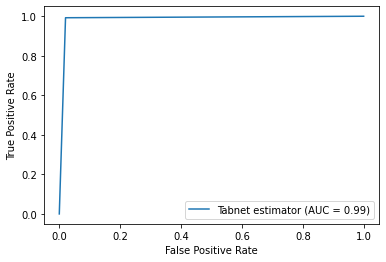

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_test_lgb)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Tabnet estimator')
display.plot()  
plt.show()

In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 18.8MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=81bb9fac3a7a253a0fa45360ba6fc69d3f18e47feef9627035a6149791f485f1
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[0, 1],
    mode='classification'
)

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[5011], 
    predict_fn=rf.predict_proba
)

exp.show_in_notebook(show_table=True)

In [ ]:
!pip install dill

In [ ]:
import dill

In [ ]:
with open('data', 'wb') as f:
    dill.dump(explainer, f)

In [ ]:
def logres(X_train,Y_train,X_test,Y_test):
  print("\nLogistic Estimator")
  log = LogisticRegression(max_iter=600,random_state=7)
  log.fit(X_train,Y_train)
  Y_test_log = log.predict(X_test)
  print("Fowlkes_mallows_score = ",fowlkes_mallows_score(Y_test,Y_test_log))
  print("F1-Score = ",f1_score(Y_test, Y_test_log))
  fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_test_log)
  roc_auc = metrics.auc(fpr, tpr)
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Logistic estimator')
  display.plot()
  plt.show()     

In [ ]:
def dectree(X_train,Y_train,X_test,Y_test):
  print("\nDecision Tree")
  sktree=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=8,random_state=7)
  sktree.fit(X_train,Y_train)
  Y_test_dt=sktree.predict(X_test)
  print("Fowlkes_mallows_score = ",fowlkes_mallows_score(Y_test,Y_test_dt))
  print("F1-Score = ",f1_score(Y_test, Y_test_dt))
  fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_test_dt)
  roc_auc = metrics.auc(fpr, tpr)
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Decision Tree')
  display.plot()
  plt.show()

In [ ]:
def randfor(X_train,Y_train,X_test,Y_test):
  print("\nRandom Forest")
  rf=RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=6,random_state=7)
  rf.fit(X_train,Y_train)
  Y_test_rf=rf.predict(X_test)
  print("Fowlkes_mallows_score = ",fowlkes_mallows_score(Y_test,Y_test_rf))
  print("F1-Score = ",f1_score(Y_test, Y_test_rf))
  fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_test_rf)
  roc_auc = metrics.auc(fpr, tpr)
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Random Forest')
  display.plot()
  plt.show()

In [ ]:
def tabnet(X_train,Y_train,X_test,Y_test):
  print("\nTabnet Classifier")
  clf = TabNetClassifier()
  clf.fit(X_train.values, Y_train.values,eval_set=[(X_test.values,Y_test.values)],eval_metric=['auc'])
  Y_test_tabnet=clf.predict(X_test.values)
  print("Fowlkes_mallows_score = ",fowlkes_mallows_score(Y_test,Y_test_tabnet))
  print("F1-Score = ",f1_score(Y_test, Y_test_tabnet))
  fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_test_tabnet)
  roc_auc = metrics.auc(fpr, tpr)
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Tabnet')
  display.plot()
  plt.show()

In [ ]:
def xgboost(X_train,Y_train,X_test,Y_test):
  print("\nXG boost")
  xg = XGBClassifier(random_state=7)
  xg.fit(X_train, Y_train)
  Y_test_xg=xg.predict(X_test)
  print("Fowlkes_mallows_score = ",fowlkes_mallows_score(Y_test,Y_test_xg))
  print("F1-Score = ",f1_score(Y_test, Y_test_xg))
  fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_test_xg)
  roc_auc = metrics.auc(fpr, tpr)
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='XG boost')
  display.plot()
  plt.show()

In [ ]:
def lightgbm(X_train,Y_train,X_test,Y_test):
  print("\nLightGBM")
  lgb = LGBMClassifier()
  lgb.fit(X_train,Y_train,eval_set=[(X_test,Y_test)],eval_metric=['auc'])
  Y_test_lgb=lgb.predict(X_test)
  print("Fowlkes_mallows_score = ",fowlkes_mallows_score(Y_test,Y_test_lgb))
  print("F1-Score = ",f1_score(Y_test, Y_test_lgb))
  fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_test_lgb)
  roc_auc = metrics.auc(fpr, tpr)
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='LightGBM')
  display.plot()
  plt.show()

Trial 1

Logistic Estimator
Fowlkes_mallows_score =  0.808600084007226
F1-Score =  0.8847111849128217


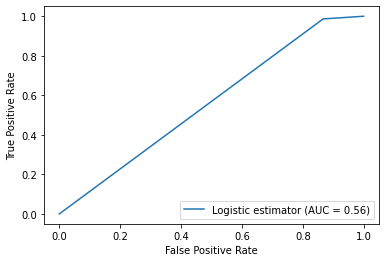


Decision Tree
Fowlkes_mallows_score =  0.9536850139527434
F1-Score =  0.9798961523099454


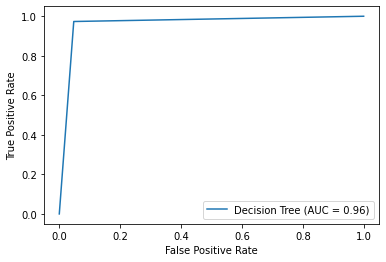


Random Forest
Fowlkes_mallows_score =  0.9325511350650565
F1-Score =  0.9700019606561663


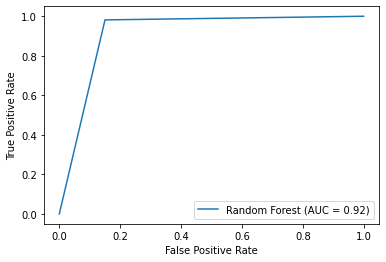


Tabnet Classifier
Device used : cuda
epoch 0  | loss: 0.39134 | val_0_auc: 0.58038 |  0:00:01s
epoch 1  | loss: 0.23468 | val_0_auc: 0.81807 |  0:00:03s
epoch 2  | loss: 0.1934  | val_0_auc: 0.91329 |  0:00:04s
epoch 3  | loss: 0.16462 | val_0_auc: 0.92144 |  0:00:06s
epoch 4  | loss: 0.16905 | val_0_auc: 0.92216 |  0:00:07s
epoch 5  | loss: 0.15853 | val_0_auc: 0.9275  |  0:00:09s
epoch 6  | loss: 0.14936 | val_0_auc: 0.95423 |  0:00:11s
epoch 7  | loss: 0.14766 | val_0_auc: 0.96561 |  0:00:12s
epoch 8  | loss: 0.14143 | val_0_auc: 0.97664 |  0:00:14s
epoch 9  | loss: 0.13408 | val_0_auc: 0.98381 |  0:00:15s
epoch 10 | loss: 0.13048 | val_0_auc: 0.98585 |  0:00:17s
epoch 11 | loss: 0.11969 | val_0_auc: 0.98755 |  0:00:19s
epoch 12 | loss: 0.11934 | val_0_auc: 0.98816 |  0:00:20s
epoch 13 | loss: 0.1226  | val_0_auc: 0.9891  |  0:00:22s
epoch 14 | loss: 0.11533 | val_0_auc: 0.99062 |  0:00:23s
epoch 15 | loss: 0.11597 | val_0_auc: 0.99136 |  0:00:25s
epoch 16 | loss: 0.11415 | val_0_a

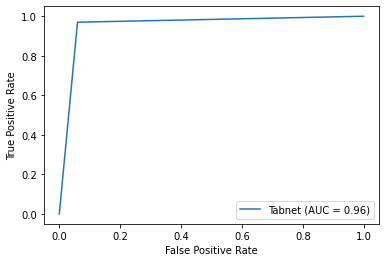


XG boost
Fowlkes_mallows_score =  0.9556556478853441
F1-Score =  0.9807666799310254


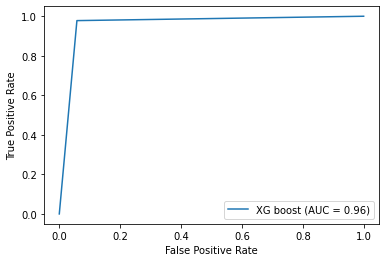


LightGBM
[1]	valid_0's auc: 0.986872	valid_0's binary_logloss: 0.445102
[2]	valid_0's auc: 0.991531	valid_0's binary_logloss: 0.387562
[3]	valid_0's auc: 0.993087	valid_0's binary_logloss: 0.342512
[4]	valid_0's auc: 0.994071	valid_0's binary_logloss: 0.306325
[5]	valid_0's auc: 0.994379	valid_0's binary_logloss: 0.275861
[6]	valid_0's auc: 0.994745	valid_0's binary_logloss: 0.250358
[7]	valid_0's auc: 0.994844	valid_0's binary_logloss: 0.228183
[8]	valid_0's auc: 0.99495	valid_0's binary_logloss: 0.209058
[9]	valid_0's auc: 0.995236	valid_0's binary_logloss: 0.192711
[10]	valid_0's auc: 0.995831	valid_0's binary_logloss: 0.178314
[11]	valid_0's auc: 0.996073	valid_0's binary_logloss: 0.165511
[12]	valid_0's auc: 0.996051	valid_0's binary_logloss: 0.154104
[13]	valid_0's auc: 0.996211	valid_0's binary_logloss: 0.143905
[14]	valid_0's auc: 0.996311	valid_0's binary_logloss: 0.134912
[15]	valid_0's auc: 0.996342	valid_0's binary_logloss: 0.126822
[16]	valid_0's auc: 0.996455	valid_0's b

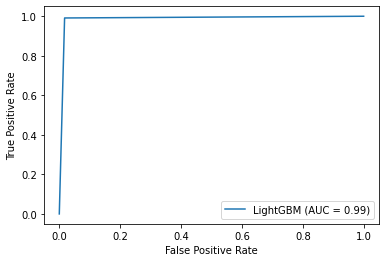

Trial 2

Logistic Estimator
Fowlkes_mallows_score =  0.8061881334391418
F1-Score =  0.8833758680040358


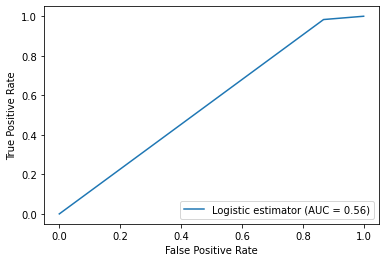


Decision Tree
Fowlkes_mallows_score =  0.9550898252504655
F1-Score =  0.9805091487669053


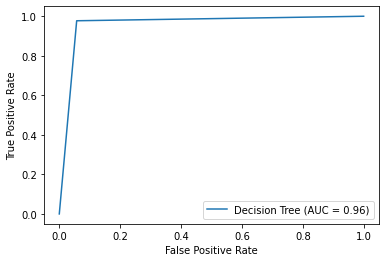


Random Forest
Fowlkes_mallows_score =  0.9304306190597612
F1-Score =  0.9689311535204845


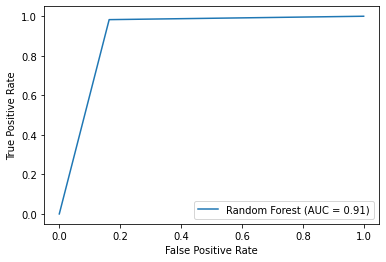


Tabnet Classifier
Device used : cuda
epoch 0  | loss: 0.38508 | val_0_auc: 0.68733 |  0:00:01s
epoch 1  | loss: 0.24101 | val_0_auc: 0.89785 |  0:00:03s
epoch 2  | loss: 0.17112 | val_0_auc: 0.91893 |  0:00:04s
epoch 3  | loss: 0.15569 | val_0_auc: 0.92899 |  0:00:06s
epoch 4  | loss: 0.14565 | val_0_auc: 0.93667 |  0:00:07s
epoch 5  | loss: 0.13326 | val_0_auc: 0.94441 |  0:00:09s
epoch 6  | loss: 0.12879 | val_0_auc: 0.96208 |  0:00:10s
epoch 7  | loss: 0.12569 | val_0_auc: 0.97109 |  0:00:12s
epoch 8  | loss: 0.13172 | val_0_auc: 0.97775 |  0:00:14s
epoch 9  | loss: 0.12329 | val_0_auc: 0.98189 |  0:00:15s
epoch 10 | loss: 0.11923 | val_0_auc: 0.98529 |  0:00:17s
epoch 11 | loss: 0.11197 | val_0_auc: 0.98795 |  0:00:18s
epoch 12 | loss: 0.11118 | val_0_auc: 0.98795 |  0:00:20s
epoch 13 | loss: 0.10907 | val_0_auc: 0.99097 |  0:00:21s
epoch 14 | loss: 0.10211 | val_0_auc: 0.99239 |  0:00:23s
epoch 15 | loss: 0.10337 | val_0_auc: 0.99253 |  0:00:24s
epoch 16 | loss: 0.09848 | val_0_a

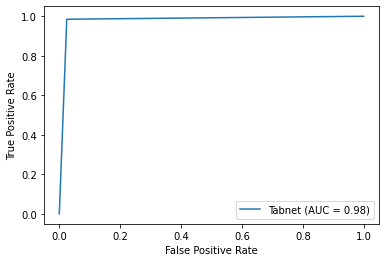


XG boost
Fowlkes_mallows_score =  0.9567506578082139
F1-Score =  0.9812495859007486


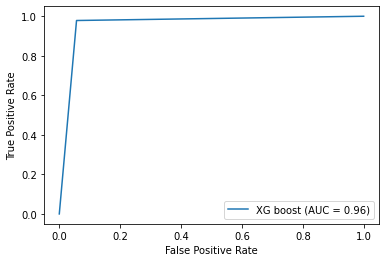


LightGBM
[1]	valid_0's auc: 0.983755	valid_0's binary_logloss: 0.444925
[2]	valid_0's auc: 0.985904	valid_0's binary_logloss: 0.387386
[3]	valid_0's auc: 0.987309	valid_0's binary_logloss: 0.343111
[4]	valid_0's auc: 0.993707	valid_0's binary_logloss: 0.306259
[5]	valid_0's auc: 0.99401	valid_0's binary_logloss: 0.276282
[6]	valid_0's auc: 0.99444	valid_0's binary_logloss: 0.250906
[7]	valid_0's auc: 0.994451	valid_0's binary_logloss: 0.229131
[8]	valid_0's auc: 0.994754	valid_0's binary_logloss: 0.210397
[9]	valid_0's auc: 0.99485	valid_0's binary_logloss: 0.193614
[10]	valid_0's auc: 0.995048	valid_0's binary_logloss: 0.179203
[11]	valid_0's auc: 0.995905	valid_0's binary_logloss: 0.166252
[12]	valid_0's auc: 0.99613	valid_0's binary_logloss: 0.154752
[13]	valid_0's auc: 0.996164	valid_0's binary_logloss: 0.144606
[14]	valid_0's auc: 0.996392	valid_0's binary_logloss: 0.135561
[15]	valid_0's auc: 0.996499	valid_0's binary_logloss: 0.127488
[16]	valid_0's auc: 0.996814	valid_0's bina

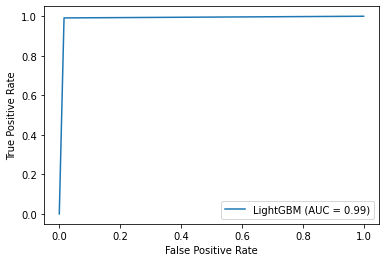

Trial 3

Logistic Estimator
Fowlkes_mallows_score =  0.8035422814941229
F1-Score =  0.8810730253353204


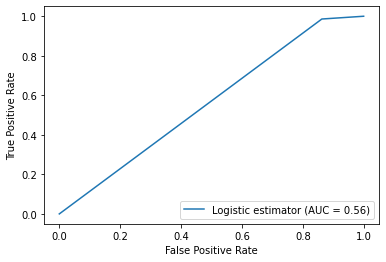


Decision Tree
Fowlkes_mallows_score =  0.953535770712506
F1-Score =  0.9798756435113993


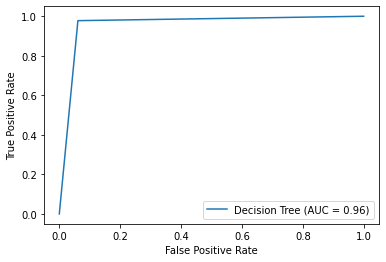


Random Forest
Fowlkes_mallows_score =  0.9252582073766205
F1-Score =  0.9666469311229525


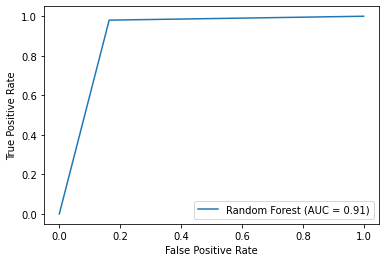


Tabnet Classifier
Device used : cuda
epoch 0  | loss: 0.37202 | val_0_auc: 0.59489 |  0:00:01s
epoch 1  | loss: 0.20465 | val_0_auc: 0.85997 |  0:00:03s
epoch 2  | loss: 0.16556 | val_0_auc: 0.9179  |  0:00:04s
epoch 3  | loss: 0.14785 | val_0_auc: 0.87248 |  0:00:06s
epoch 4  | loss: 0.14303 | val_0_auc: 0.90571 |  0:00:07s
epoch 5  | loss: 0.14122 | val_0_auc: 0.95124 |  0:00:09s
epoch 6  | loss: 0.13877 | val_0_auc: 0.95424 |  0:00:10s
epoch 7  | loss: 0.13576 | val_0_auc: 0.97233 |  0:00:12s
epoch 8  | loss: 0.13302 | val_0_auc: 0.98363 |  0:00:14s
epoch 9  | loss: 0.13097 | val_0_auc: 0.98463 |  0:00:15s
epoch 10 | loss: 0.12729 | val_0_auc: 0.98605 |  0:00:17s
epoch 11 | loss: 0.12215 | val_0_auc: 0.9882  |  0:00:18s
epoch 12 | loss: 0.12251 | val_0_auc: 0.98815 |  0:00:20s
epoch 13 | loss: 0.11688 | val_0_auc: 0.98937 |  0:00:21s
epoch 14 | loss: 0.12123 | val_0_auc: 0.98819 |  0:00:23s
epoch 15 | loss: 0.11847 | val_0_auc: 0.98853 |  0:00:24s
epoch 16 | loss: 0.11454 | val_0_a

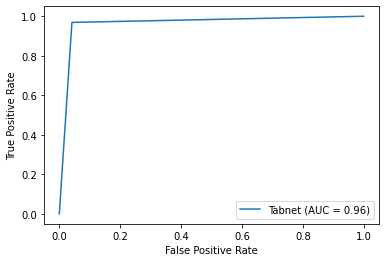


XG boost
Fowlkes_mallows_score =  0.9498979882739286
F1-Score =  0.9782347442916277


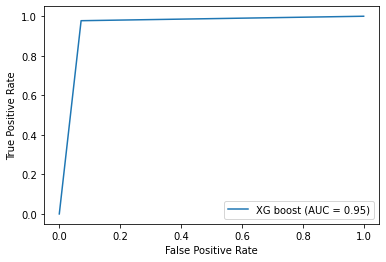


LightGBM
[1]	valid_0's auc: 0.981001	valid_0's binary_logloss: 0.453146
[2]	valid_0's auc: 0.989455	valid_0's binary_logloss: 0.394662
[3]	valid_0's auc: 0.991262	valid_0's binary_logloss: 0.349022
[4]	valid_0's auc: 0.992559	valid_0's binary_logloss: 0.312359
[5]	valid_0's auc: 0.993991	valid_0's binary_logloss: 0.281578
[6]	valid_0's auc: 0.994184	valid_0's binary_logloss: 0.255946
[7]	valid_0's auc: 0.994301	valid_0's binary_logloss: 0.233898
[8]	valid_0's auc: 0.994468	valid_0's binary_logloss: 0.215024
[9]	valid_0's auc: 0.994563	valid_0's binary_logloss: 0.198026
[10]	valid_0's auc: 0.994504	valid_0's binary_logloss: 0.183551
[11]	valid_0's auc: 0.994817	valid_0's binary_logloss: 0.170665
[12]	valid_0's auc: 0.995564	valid_0's binary_logloss: 0.159182
[13]	valid_0's auc: 0.995635	valid_0's binary_logloss: 0.149078
[14]	valid_0's auc: 0.995875	valid_0's binary_logloss: 0.139763
[15]	valid_0's auc: 0.996163	valid_0's binary_logloss: 0.131416
[16]	valid_0's auc: 0.99629	valid_0's b

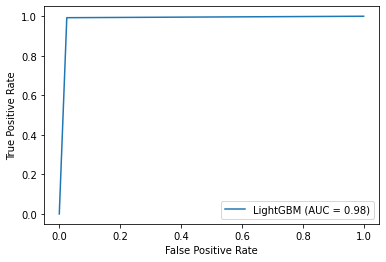

Trial 4

Logistic Estimator
Fowlkes_mallows_score =  0.8050822261520865
F1-Score =  0.8819328731254463


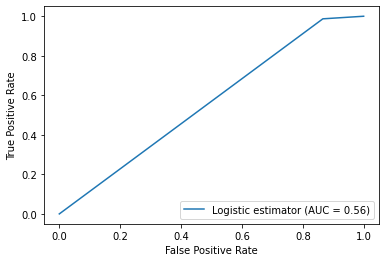


Decision Tree
Fowlkes_mallows_score =  0.9581166471352062
F1-Score =  0.9819180283953924


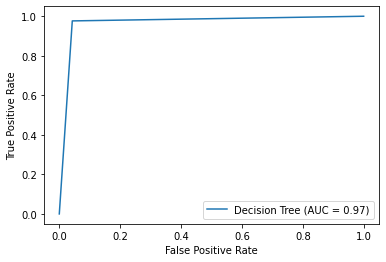


Random Forest
Fowlkes_mallows_score =  0.9338158349398837
F1-Score =  0.9706365368192866


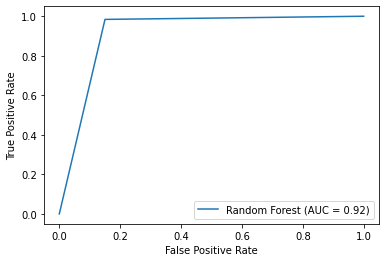


Tabnet Classifier
Device used : cuda
epoch 0  | loss: 0.39797 | val_0_auc: 0.71852 |  0:00:01s
epoch 1  | loss: 0.24785 | val_0_auc: 0.8804  |  0:00:03s
epoch 2  | loss: 0.19501 | val_0_auc: 0.9095  |  0:00:04s
epoch 3  | loss: 0.17385 | val_0_auc: 0.90915 |  0:00:06s
epoch 4  | loss: 0.16404 | val_0_auc: 0.89034 |  0:00:07s
epoch 5  | loss: 0.15341 | val_0_auc: 0.92681 |  0:00:09s
epoch 6  | loss: 0.14928 | val_0_auc: 0.89869 |  0:00:10s
epoch 7  | loss: 0.14008 | val_0_auc: 0.97665 |  0:00:12s
epoch 8  | loss: 0.13373 | val_0_auc: 0.98604 |  0:00:14s
epoch 9  | loss: 0.12927 | val_0_auc: 0.98801 |  0:00:15s
epoch 10 | loss: 0.12267 | val_0_auc: 0.98742 |  0:00:17s
epoch 11 | loss: 0.11982 | val_0_auc: 0.98995 |  0:00:18s
epoch 12 | loss: 0.11307 | val_0_auc: 0.99086 |  0:00:20s
epoch 13 | loss: 0.11959 | val_0_auc: 0.99023 |  0:00:21s
epoch 14 | loss: 0.11629 | val_0_auc: 0.99215 |  0:00:23s
epoch 15 | loss: 0.11158 | val_0_auc: 0.99127 |  0:00:24s
epoch 16 | loss: 0.10612 | val_0_a

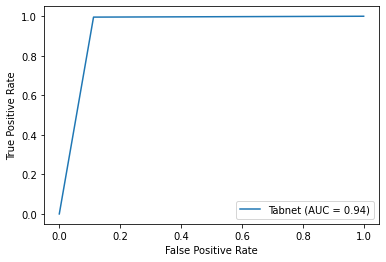


XG boost
Fowlkes_mallows_score =  0.9565922529999045
F1-Score =  0.9812175303050487


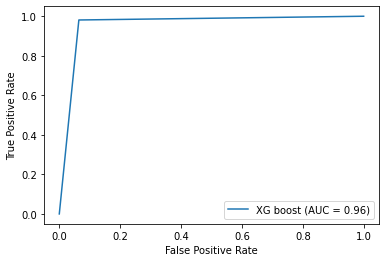


LightGBM
[1]	valid_0's auc: 0.98674	valid_0's binary_logloss: 0.449872
[2]	valid_0's auc: 0.993673	valid_0's binary_logloss: 0.390681
[3]	valid_0's auc: 0.994767	valid_0's binary_logloss: 0.344732
[4]	valid_0's auc: 0.995369	valid_0's binary_logloss: 0.30781
[5]	valid_0's auc: 0.995662	valid_0's binary_logloss: 0.277184
[6]	valid_0's auc: 0.995674	valid_0's binary_logloss: 0.251215
[7]	valid_0's auc: 0.995798	valid_0's binary_logloss: 0.228934
[8]	valid_0's auc: 0.995851	valid_0's binary_logloss: 0.209549
[9]	valid_0's auc: 0.996115	valid_0's binary_logloss: 0.192864
[10]	valid_0's auc: 0.996207	valid_0's binary_logloss: 0.17812
[11]	valid_0's auc: 0.996243	valid_0's binary_logloss: 0.165125
[12]	valid_0's auc: 0.996582	valid_0's binary_logloss: 0.153458
[13]	valid_0's auc: 0.996791	valid_0's binary_logloss: 0.143221
[14]	valid_0's auc: 0.996881	valid_0's binary_logloss: 0.133945
[15]	valid_0's auc: 0.997008	valid_0's binary_logloss: 0.125684
[16]	valid_0's auc: 0.997306	valid_0's bin

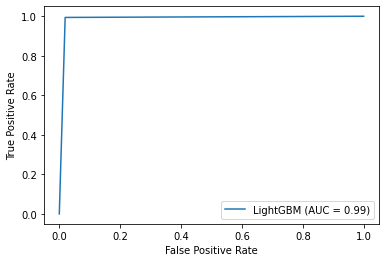

Trial 5

Logistic Estimator
Fowlkes_mallows_score =  0.8063494375513929
F1-Score =  0.8830968354806152


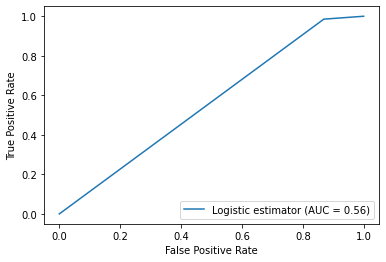


Decision Tree
Fowlkes_mallows_score =  0.9556611264801003
F1-Score =  0.9807923169267707


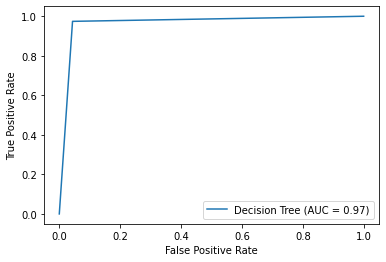


Random Forest
Fowlkes_mallows_score =  0.9341682699435184
F1-Score =  0.9707594688297245


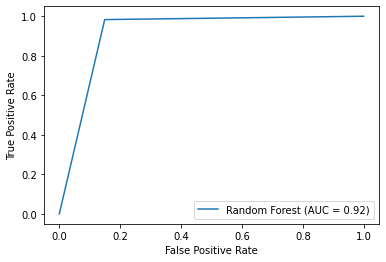


Tabnet Classifier
Device used : cuda
epoch 0  | loss: 0.36682 | val_0_auc: 0.74597 |  0:00:01s
epoch 1  | loss: 0.20122 | val_0_auc: 0.89443 |  0:00:03s
epoch 2  | loss: 0.17385 | val_0_auc: 0.90777 |  0:00:04s
epoch 3  | loss: 0.16413 | val_0_auc: 0.85935 |  0:00:06s
epoch 4  | loss: 0.15755 | val_0_auc: 0.90126 |  0:00:07s
epoch 5  | loss: 0.14754 | val_0_auc: 0.94087 |  0:00:09s
epoch 6  | loss: 0.13837 | val_0_auc: 0.94846 |  0:00:11s
epoch 7  | loss: 0.13319 | val_0_auc: 0.96896 |  0:00:12s
epoch 8  | loss: 0.12796 | val_0_auc: 0.97993 |  0:00:14s
epoch 9  | loss: 0.12082 | val_0_auc: 0.98574 |  0:00:15s
epoch 10 | loss: 0.11376 | val_0_auc: 0.99029 |  0:00:17s
epoch 11 | loss: 0.109   | val_0_auc: 0.99127 |  0:00:19s
epoch 12 | loss: 0.11238 | val_0_auc: 0.99296 |  0:00:20s
epoch 13 | loss: 0.10868 | val_0_auc: 0.99174 |  0:00:22s
epoch 14 | loss: 0.10324 | val_0_auc: 0.99228 |  0:00:23s
epoch 15 | loss: 0.09952 | val_0_auc: 0.99332 |  0:00:25s
epoch 16 | loss: 0.09995 | val_0_a

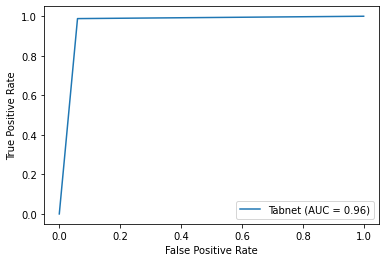


XG boost
Fowlkes_mallows_score =  0.9553228340429963
F1-Score =  0.9806237558062376


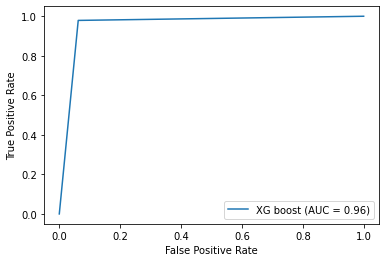


LightGBM
[1]	valid_0's auc: 0.984281	valid_0's binary_logloss: 0.446931
[2]	valid_0's auc: 0.991581	valid_0's binary_logloss: 0.388416
[3]	valid_0's auc: 0.993387	valid_0's binary_logloss: 0.343348
[4]	valid_0's auc: 0.994068	valid_0's binary_logloss: 0.307223
[5]	valid_0's auc: 0.994642	valid_0's binary_logloss: 0.276751
[6]	valid_0's auc: 0.994808	valid_0's binary_logloss: 0.250976
[7]	valid_0's auc: 0.995028	valid_0's binary_logloss: 0.229213
[8]	valid_0's auc: 0.995061	valid_0's binary_logloss: 0.209895
[9]	valid_0's auc: 0.995147	valid_0's binary_logloss: 0.193549
[10]	valid_0's auc: 0.995454	valid_0's binary_logloss: 0.178974
[11]	valid_0's auc: 0.995766	valid_0's binary_logloss: 0.166052
[12]	valid_0's auc: 0.995889	valid_0's binary_logloss: 0.15482
[13]	valid_0's auc: 0.996093	valid_0's binary_logloss: 0.144704
[14]	valid_0's auc: 0.996178	valid_0's binary_logloss: 0.135387
[15]	valid_0's auc: 0.996249	valid_0's binary_logloss: 0.127205
[16]	valid_0's auc: 0.996462	valid_0's b

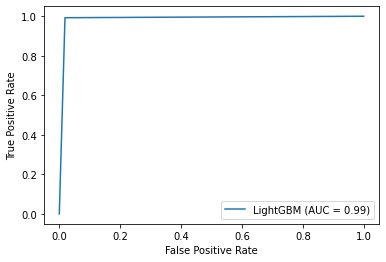

In [ ]:
for _ in range(5):
  print("Trial",_+1)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
  logres(X_train,Y_train,X_test,Y_test)
  dectree(X_train,Y_train,X_test,Y_test)
  randfor(X_train,Y_train,X_test,Y_test)
  tabnet(X_train,Y_train,X_test,Y_test)
  xgboost(X_train,Y_train,X_test,Y_test)
  lightgbm(X_train,Y_train,X_test,Y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(xg, X, Y, cv=cv)

array([0.97005988, 0.96854567, 0.97178058, 0.96792622, 0.96792622])

In [ ]:
xg.feature_importances_

array([0.        , 0.12260962, 0.20577337, 0.        , 0.        ,
       0.02470499, 0.15396011, 0.02681967, 0.        , 0.        ,
       0.38051444, 0.        , 0.0442967 , 0.04132107], dtype=float32)

In [ ]:
xg_weights=xg.feature_importances_*1000
coef_weight_xg = pd.DataFrame([(a,b) for (a,b) in (zip(columns,xg_weights.reshape(14,)))],columns=['Feature','Weightage'])
coef_weight_xg.sort_values(by=['Weightage']).reset_index(drop=True)

,Feature,Weightage
0,Age,0.000000
1,HouseholdSize,0.000000
2,State,0.000000
3,LoanTerm,0.000000
4,InterestRate,0.000000
5,HomeValue,0.000000
6,MedianHomeValue,24.704988
7,Debt,26.819668
8,ProductType,41.321068
9,LoanAmount,44.296696


In [ ]:
lgb_weights=lgb.feature_importances_
coef_weight_lgb = pd.DataFrame([(a,b) for (a,b) in (zip(columns,lgb_weights.reshape(14,)))],columns=['Feature','Weightage'])
coef_weight_lgb.sort_values(by=['Weightage']).reset_index(drop=True)

,Feature,Weightage
0,LoanTerm,8
1,HouseholdSize,21
2,State,22
3,InterestRate,22
4,Age,36
5,HomeValue,38
6,MedianHomeValue,41
7,LoanAmount,77
8,ProductType,240
9,CreditIncidents,308


In [ ]:
rf_weights=rf.feature_importances_*1000
coef_weight_rf = pd.DataFrame([(a,b) for (a,b) in (zip(columns,rf_weights.reshape(14,)))],columns=['Feature','Weightage'])
coef_weight_rf.sort_values(by=['Weightage']).reset_index(drop=True)

,Feature,Weightage
0,LoanTerm,0.083068
1,HouseholdSize,0.188687
2,Age,0.554175
3,InterestRate,0.832795
4,State,0.939825
5,LoanAmount,3.887742
6,ProductType,7.467316
7,HomeValue,8.127884
8,Debt,24.959848
9,MedianHomeValue,34.687072


##Downloading Pickle Files of Various Models

In [ ]:
filename = 'finalized_xgboost_model.pickle'
pickle.dump(xg, open(filename, 'wb'))

In [ ]:
filename = 'finalized_Lightgbm_model.pickle'
pickle.dump(lgb, open(filename, 'wb'))

In [ ]:
filename = 'finalized_Random_forest_model.pickle'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
filename = 'finalized_Logistic_model.pickle'
pickle.dump(log, open(filename, 'wb'))

In [ ]:
filename = 'finalized_Decision_tree_model.pickle'
pickle.dump(sktree, open(filename, 'wb'))

In [ ]:
states=np.array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'HI', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'NC', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV'])
states_coded=le.transform(states)
state_dic={}
for i in range(len(states)):
  state_dic[states[i]]=states_coded[i]
# np.mean(X).to_csv('Mean.csv')
# files.download('Mean.csv')
# np.std(X).to_csv('std.csv')
# files.download('std.csv')

In [ ]:
state_dic

{'AL': 0,
 'AR': 1,
 'AZ': 2,
 'CA': 3,
 'CO': 4,
 'CT': 5,
 'FL': 6,
 'GA': 7,
 'HI': 8,
 'IA': 9,
 'ID': 10,
 'IL': 11,
 'IN': 12,
 'KS': 13,
 'KY': 14,
 'LA': 15,
 'MA': 16,
 'MD': 17,
 'ME': 18,
 'MI': 19,
 'MN': 20,
 'MO': 21,
 'MS': 22,
 'NC': 23,
 'NH': 24,
 'NJ': 25,
 'NM': 26,
 'NV': 27,
 'NY': 28,
 'OH': 29,
 'OK': 30,
 'OR': 31,
 'PA': 32,
 'RI': 33,
 'SC': 34,
 'TN': 35,
 'TX': 36,
 'UT': 37,
 'VA': 38,
 'VT': 39,
 'WA': 40,
 'WI': 41,
 'WV': 42}